# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [3]:
import numpy as np
import pandas as pd

In [35]:
data = pd.read_csv("ex1data1.csv")
data.size / data.ndim

97.0

### Visualiser les données

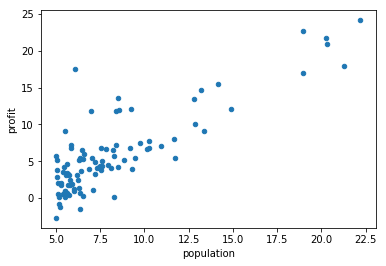

In [12]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformez-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [23]:
X = np.array(data['population'])
y = np.array(data['profit'])
data['population'][0]

6.1101


## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [18]:
theta = np.array([0, 0])

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [98]:
def predict(X, theta):
#     if type(theta) is not np.ndarray:
#         raise Exception("theta must be a np.ndarray object")
#     if type(X) is int:
#         X = np.array([1, X])
#     elif type(X) is np.ndarray:
#         X = np.insert(X, 0, 1, axis=1)
#     else:
#         raise Exception("X must be np.ndarray or int only")
#     return theta.dot(X)
    ret = theta[0] + theta[1] * X
    #print("Predicting with X = " + str(X) + " and theta = " + str(theta) + " | Which gives " + str(ret))
    return ret

predict(42, theta)

0

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [112]:
def sub_sum(theta, X, y, m, thZero=False):
    ret = 0
    for i in range(m):
        if thZero:
            x = 1
        else:
            x = X[i]
        delta = predict(X[i], theta) - y[i]
        ret += delta * x
    return ret

def fit(X, y, theta, alpha, num_iters):
    m = X.size
    theta = theta.astype('float')
    for it in range(num_iters):
        theta[0], theta[1] = theta[0] - alpha * ((sub_sum(theta, X, y, m, True)) / m), theta[1] - alpha * ((sub_sum(theta, X, y, m)) / m)    

    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [113]:
fit(X, y, theta, 0.01, 1500)

array([-3.63029144,  1.16636235])

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [104]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

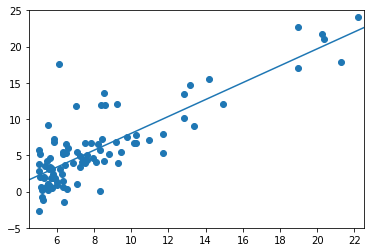

In [107]:
visualize(fit(X, y, theta, 0.01, 1500))

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [108]:
def cost(X, y, theta):
    m = X.size
    ret = 0
    for i in range(m):
        ret += (predict(X[i], theta) - y[i]) ** 2
    return (ret / (2 * m))


### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [110]:
cost(X, y, [0, 0])

32.072733877455654

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [111]:
cost(X, y, [-1, 2])

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [114]:
def sub_sum(theta, X, y, m, thZero=False):
    ret = 0
    for i in range(m):
        if thZero:
            x = 1
        else:
            x = X[i]
        delta = predict(X[i], theta) - y[i]
        ret += delta * x
    return ret

def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.size
    theta = theta.astype('float')
    J_history = []
    for it in range(num_iters):
        J_history.append(cost(X, y, theta)) 
        theta[0], theta[1] = theta[0] - alpha * ((sub_sum(theta, X, y, m, True)) / m), theta[1] - alpha * ((sub_sum(theta, X, y, m)) / m)    

    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [115]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [128]:
# Lancez l'entraînement avec votre nouvelle fonction
_, J_history = fit_with_cost(X, y, theta, 0.0001, 500)


### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

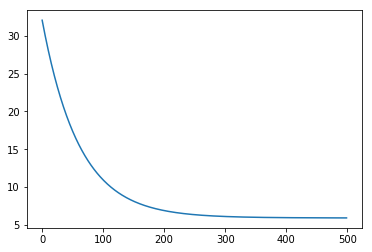

In [129]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)